In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
from utils_.helper import *
from utils_.tw import *
from tqdm import tqdm
import pprint
from utils_.state_lattice import *
from utils_.visualization import *
%matplotlib notebook
%load_ext autoreload
# %load_ext snakeviz
%autoreload 2

/home/yu/Documents/courses/KKH598/proj
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load parameters

In [6]:
cfg = Config("params/tw.yaml")
sys = TWSys(cfg.value, seed = 0)

load config...
{'space_sets': {'d': 0.8,
                'idx': [0, 1, 2],
                'res': 0.5,
                'state_max': [inf, inf, 3.1415927],
                'state_min': [-inf, -inf, -3.1415927],
                'u_max': [2, 2],
                'u_min': [0, 0]},
 'system': {'ctrl_dim': 2, 'dt': 0.02, 'name': 'tw', 'obs_dim': 3},
 'trajOpt': {'N': 20,
             'Q': [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
             'Q_R': [[1, 0, 0], [0, 1, 0], [0, 0, 0.1]],
             'R': [[0.1, 0], [0, 0.1]],
             'h': 0.1}}
Init wheelchair Model


# state lattice

In [7]:
sl = StateLattice(sys)
# %snakeviz sl.gen_data_full()
sl.gen_data_full()

generated 39 primitives!
generated 51 primitives!


In [8]:
# sl.keys

In [9]:
# sl.trans_sl()

<IPython.core.display.Javascript object>


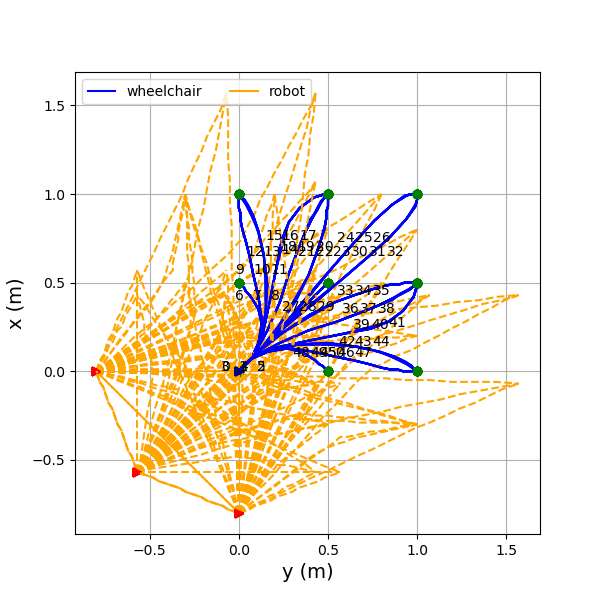

No handles with labels found to put in legend.


In [10]:
axs = plotCfg1(size = [6,6], sub = 1,  title = '', labels = ['x (m)', 'y (m)'])
orien_idx = 1
sl.plot_SL(axs,orien_idx,0, plot_dir = False, label = True, plot_cost=False, plot_idx = True)
sl.plot_SL(axs,orien_idx,1)
sl.plot_SL(axs,orien_idx,2)
# axs.set_xlim(-2, 2)
# axs.set_ylim(-0.1, 0.1)

In [11]:
sl.data[(0, 0, 3, 3)]['states_w'][22]

array([[-0.  , -0.  , -0.  ],
       [ 0.1 ,  0.  ,  0.  ],
       [ 0.18,  0.  ,  0.  ],
       [ 0.24,  0.  ,  0.  ],
       [ 0.29,  0.  ,  0.  ],
       [ 0.34,  0.  ,  0.  ],
       [ 0.37,  0.  ,  0.  ],
       [ 0.39,  0.  ,  0.  ],
       [ 0.42,  0.  ,  0.  ],
       [ 0.43,  0.  ,  0.  ],
       [ 0.45,  0.  ,  0.  ],
       [ 0.46,  0.  , -0.  ],
       [ 0.47,  0.  , -0.  ],
       [ 0.47,  0.  , -0.  ],
       [ 0.48,  0.  , -0.  ],
       [ 0.49,  0.  , -0.  ],
       [ 0.49,  0.  , -0.  ],
       [ 0.49,  0.  , -0.  ],
       [ 0.5 ,  0.  , -0.  ],
       [ 0.5 ,  0.  ,  0.  ]])

In [12]:
path = "logs/sl.npy"
sl.save(path)
# sl.load(path)

# Trajertory optimization

In [13]:
opt = TrajOpt(sys)
dt = cfg.value['system']['dt']
T = opt.N*opt.h
n = int(T/dt)

In [22]:
x_cur = np.array([0,0,0,0])
x_tgt = np.array([1,1,np.pi/4, 0]) 
# x_tgt = np.array([1,0,0, 0]) 
opt.step(stateCurrent = x_cur, stateTarget = x_tgt, interpolation=False, initMethod = 'linear')
opt.state_sol, opt.robot_state_sol = np.round(opt.state_sol,2), np.round(opt.robot_state_sol, 2)

<IPython.core.display.Javascript object>


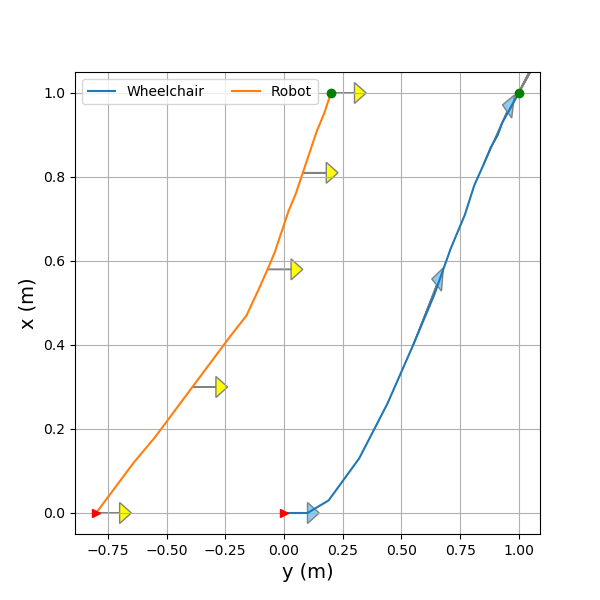

No handles with labels found to put in legend.


In [23]:
axs = plotTraj(opt.state_sol, opt.robot_state_sol, arrow=True)
# axs.set_xlim(-0.1, 1.25)
# axs.set_ylim(-0.1,0.1)

<IPython.core.display.Javascript object>


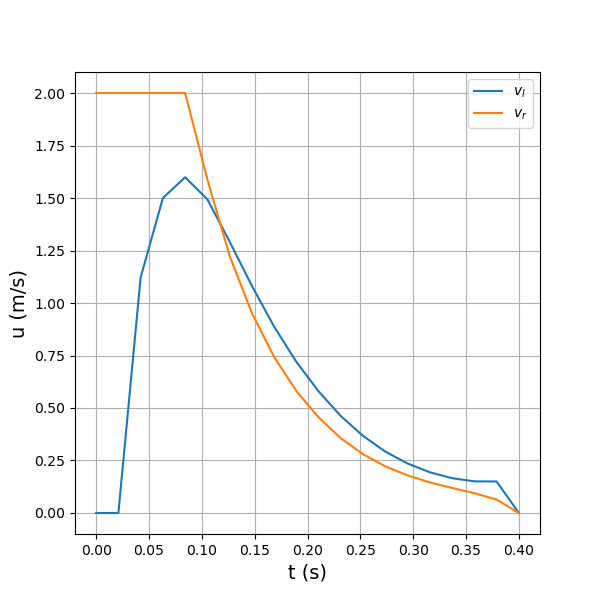

No handles with labels found to put in legend.


In [24]:
plotCtrl(opt.ctrl_sol)